In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files

home_data = pd.read_csv('./Data/Home_Data/combined_sensor_dataset_latest.csv')
# df2 = pd.read_csv('./Data/Prof_Office_Data/office_actuator_records.csv')

#original_df = df1.copy() #Keep a copy to compare
## Toggle the values of Light Sensor.
home_data.loc[home_data['sensor_name'] == 'Light Sensor', 'state'] = 1 - home_data['state']

# Change the continuous values to 1. We only need to check if the sensor is active or not
home_data.loc[home_data['sensor_name'].isin(['Kitchen Humidity', 'Kitchen Temperature', 'Bedroom Humidity', 'Bedroom Temperature', 'Washroom Temperature', 'Washroom Humidity']), 'state'] = 1

# Convert the 'datetime' column to a datetime data type if necessary
home_data['datetime'] = pd.to_datetime(home_data['seconds'], unit='s')
# combined_office_data['datetime'] = pd.to_datetime(combined_office_data['date'] + ' ' + combined_office_data['time'], format='%d/%m/%y %H:%M')

# Sort by the 'datetime' column
home_data = home_data.sort_values(by='datetime')
#Filter data for a custom date period
home_data = home_data.set_index('datetime')
start_date = '2024-02-15'
end_date = '2024-06-15'

# Filter the data for the specific date range (inclusive)
home_data = home_data.loc[start_date:end_date]
home_data.reset_index()

# filtered_home_data = home_data[~home_data['sensor_name'].isin(['Kitchen Humidity', 'Kitchen Temperature', 'Bedroom Humidity', 'Bedroom Temperature', 'Washroom Temperature', 'Washroom Humidity'])]
filtered_home_data = home_data
# filtered_home_data = filtered_home_data.set_index('datetime')

# Display the sorted, combined DataFrame
print(filtered_home_data.shape, home_data.shape)
print(home_data.head(10))
unique_sensor = filtered_home_data.sensor_name.unique()
print(unique_sensor)

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_18800\3758745659.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  home_data = pd.read_csv('./Data/Home_Data/combined_sensor_dataset_latest.csv')


(2958760, 8) (2958760, 8)
                                   date   time       seconds  state  \
datetime                                                              
2024-02-15 00:00:00.969993353  02/14/24  18:00  1.707955e+09    0.0   
2024-02-15 00:00:01.673879623  02/14/24  18:00  1.707955e+09    1.0   
2024-02-15 00:00:02.473011255  02/14/24  18:00  1.707955e+09    1.0   
2024-02-15 00:00:02.493557692  02/14/24  18:00  1.707955e+09    0.0   
2024-02-15 00:00:02.735476732  02/14/24  18:00  1.707955e+09    1.0   
2024-02-15 00:00:03.070734739  02/14/24  18:00  1.707955e+09    1.0   
2024-02-15 00:00:03.381387711  02/14/24  18:00  1.707955e+09    1.0   
2024-02-15 00:00:03.791739225  02/14/24  18:00  1.707955e+09    0.0   
2024-02-15 00:00:04.587822914  02/14/24  18:00  1.707955e+09    0.0   
2024-02-15 00:00:05.336026907  02/14/24  18:00  1.707955e+09    0.0   

                                       sensor_name       thing_name  \
datetime                                          

In [67]:
# filtered_home_data = filtered_home_data.set_index('datetime') #make the date column as index


# combined_office_data_filtered = combined_office_data.between_time('07:00', '19:00')
# print(combined_office_data.size, combined_office_data_filtered.size)
home_hourly = filtered_home_data.state.resample('2h').sum() #resample on hourly basis and get summary of sensor values on 2 hours.

# home_hourly = home_hourly.between_time('09:00', '18:00')
home_hourly = home_hourly.reset_index()
filtered_home_data = filtered_home_data.reset_index()

print(home_hourly.head, filtered_home_data.head(10))
# home_hourly.to_csv('./Output_CSV/home_data/test-sampling-1.csv', index=False)

<bound method NDFrame.head of                 datetime   state
0    2024-02-15 00:00:00  3404.0
1    2024-02-15 02:00:00  2243.0
2    2024-02-15 04:00:00  2506.0
3    2024-02-15 06:00:00  1565.0
4    2024-02-15 08:00:00   391.0
...                  ...     ...
1459 2024-06-15 14:00:00  1865.0
1460 2024-06-15 16:00:00  1879.0
1461 2024-06-15 18:00:00  2553.0
1462 2024-06-15 20:00:00  1565.0
1463 2024-06-15 22:00:00  1540.0

[1464 rows x 2 columns]>                        datetime      date   time       seconds  state  \
0 2024-02-15 00:00:00.969993353  02/14/24  18:00  1.707955e+09    0.0   
1 2024-02-15 00:00:01.673879623  02/14/24  18:00  1.707955e+09    1.0   
2 2024-02-15 00:00:02.473011255  02/14/24  18:00  1.707955e+09    1.0   
3 2024-02-15 00:00:02.493557692  02/14/24  18:00  1.707955e+09    0.0   
4 2024-02-15 00:00:02.735476732  02/14/24  18:00  1.707955e+09    1.0   
5 2024-02-15 00:00:03.070734739  02/14/24  18:00  1.707955e+09    1.0   
6 2024-02-15 00:00:03.381387711  02/1

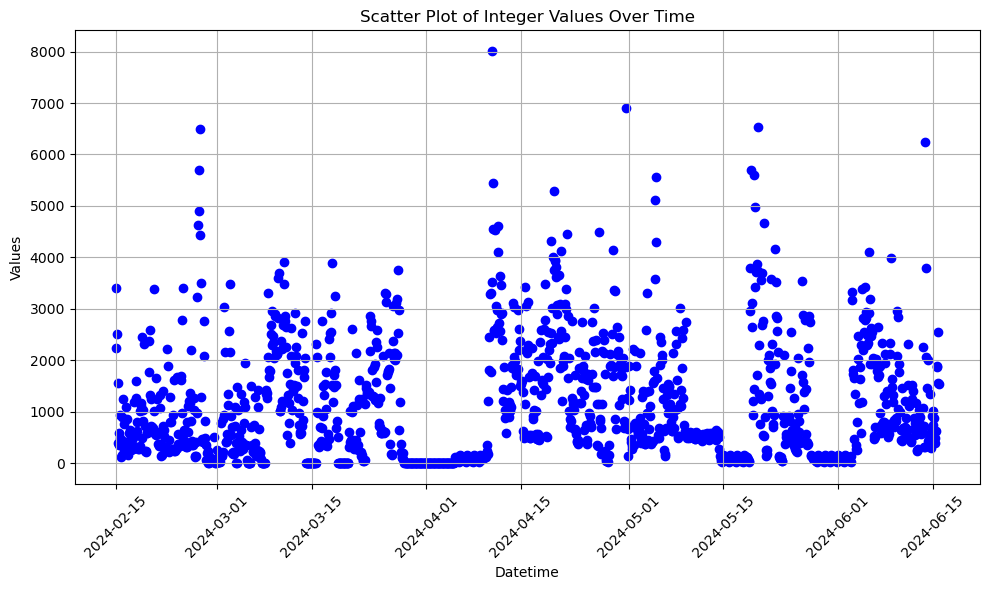

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(home_hourly['datetime'], home_hourly['state'], color='blue', marker='o')

# Formatting the plot
plt.title('Scatter Plot of Integer Values Over Time')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.grid(True)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

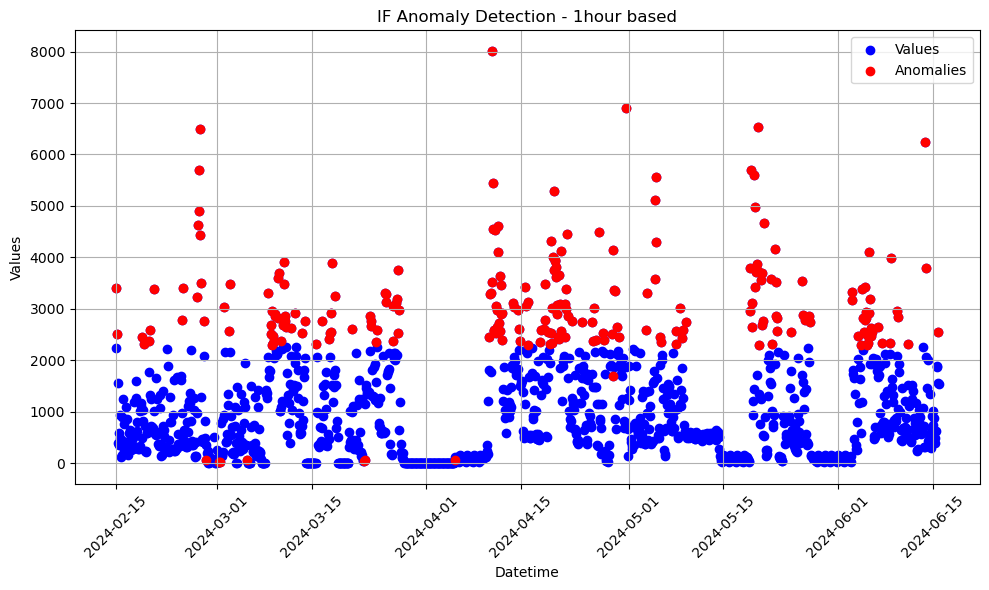

Total anomalies: 230, Percentage of anomalous values: 15.710382513661203%
                datetime   state  anomaly
1    2024-02-15 02:00:00  2243.0        1
3    2024-02-15 06:00:00  1565.0        1
4    2024-02-15 08:00:00   391.0        1
5    2024-02-15 10:00:00   343.0        1
6    2024-02-15 12:00:00   584.0        1
...                  ...     ...      ...
1458 2024-06-15 12:00:00   622.0        1
1459 2024-06-15 14:00:00  1865.0        1
1460 2024-06-15 16:00:00  1879.0        1
1462 2024-06-15 20:00:00  1565.0        1
1463 2024-06-15 22:00:00  1540.0        1

[1089 rows x 3 columns]
(230, 3)


In [69]:
from sklearn.ensemble import IsolationForest

# lab_hourly['datetime'] = pd.to_datetime(lab_hourly['datetime'])

# Prepare data for IsolationForest
values = home_hourly[['state']]  # Selecting the 'values' column as input for the model

# Initialize and fit the IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)
home_hourly['anomaly'] = model.fit_predict(values)

# Isolation Forest outputs:
# -1 for anomalies
#  1 for normal data points

# Filter the anomalies
anomalies = home_hourly[home_hourly['anomaly'] == -1]
non_anomalies = home_hourly[home_hourly['anomaly'] == 1]
# print(df)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(home_hourly['datetime'], home_hourly['state'], label='Values', color='blue', marker='o')
plt.scatter(anomalies['datetime'], anomalies['state'], color='red', label='Anomalies', marker='o')
plt.title('IF Anomaly Detection - 1hour based')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plt.savefig('./Plots/Office_plots/IF_2H.png')
plt.show()


count_anomaly_h = (home_hourly['anomaly'] == -1).sum()

# Calculate the percentage of values equal to -1
percentage_h = (count_anomaly_h / len(home_hourly)) * 100
print(f"Total anomalies: {count_anomaly_h}, Percentage of anomalous values: {percentage_h}%")

#only print the non anomalous values which are not zero
df_filtered = non_anomalies[non_anomalies['state'] != 0]
print(df_filtered)

print( anomalies.shape)
# home_hourly.to_csv('./Output_CSV/home_data/IF_lab_anomaly_1h.csv', index=False)

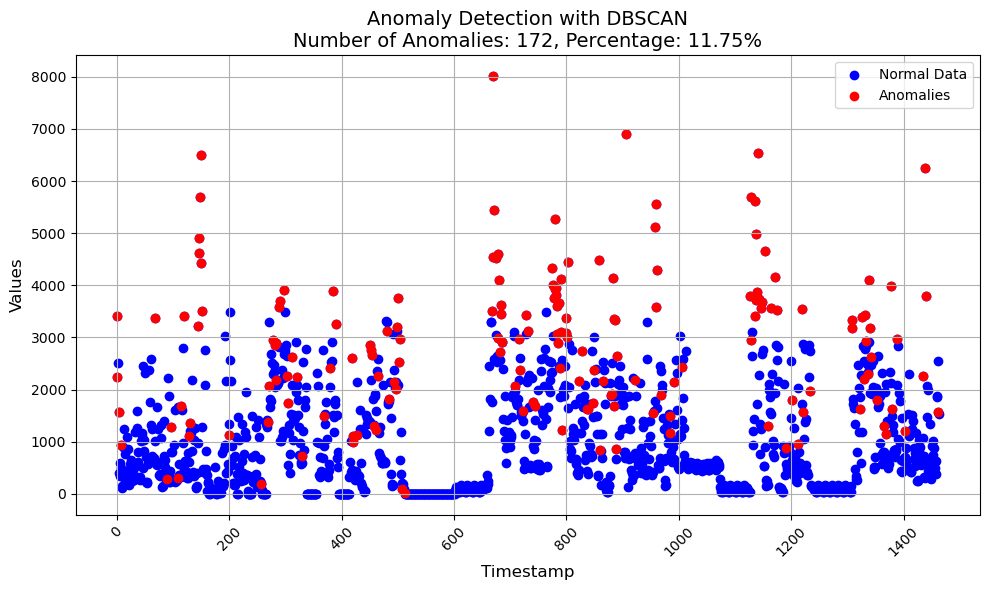

               datetime   state  anomaly  cluster
0   2024-02-15 00:00:00  3404.0       -1       -1
1   2024-02-15 02:00:00  2243.0        1       -1
3   2024-02-15 06:00:00  1565.0        1       -1
7   2024-02-15 14:00:00   943.0        1       -1
67  2024-02-20 14:00:00  3378.0       -1       -1
89  2024-02-22 10:00:00   293.0        1       -1
96  2024-02-23 00:00:00  1291.0        1       -1
109 2024-02-24 02:00:00   296.0        1       -1
115 2024-02-24 14:00:00  1691.0        1       -1
119 2024-02-24 22:00:00  3407.0       -1       -1              datetime   state  anomaly  cluster
0 2024-02-15 00:00:00  3404.0       -1       -1
1 2024-02-15 02:00:00  2243.0        1       -1
2 2024-02-15 04:00:00  2506.0       -1        0
3 2024-02-15 06:00:00  1565.0        1       -1
4 2024-02-15 08:00:00   391.0        1        1
5 2024-02-15 10:00:00   343.0        1        2
6 2024-02-15 12:00:00   584.0        1        3
7 2024-02-15 14:00:00   943.0        1       -1
8 2024-02-15 16:00

In [72]:
## DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Prepare the data for DBSCAN
scaler = StandardScaler()
values_scaled = scaler.fit_transform(home_hourly[['state']])  # Standardize 'values'

# Apply DBSCAN
dbscan = DBSCAN(eps=0.005, min_samples=3)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(values_scaled)

# Add the labels to the DataFrame
home_hourly['cluster'] = labels

# Identify anomalies (noise points labeled as -1)
anomalies_db = home_hourly[home_hourly['cluster'] == -1]

# Calculate anomaly statistics
num_anomalies = len(anomalies_db)
total_points = len(home_hourly)
percentage_anomalies = (num_anomalies / total_points) * 100

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(home_hourly.index, home_hourly['state'], c='blue', label='Normal Data')
plt.scatter(anomalies_db.index, anomalies_db['state'], c='red', label='Anomalies')

# Add title and labels
plt.title(f'Anomaly Detection with DBSCAN\nNumber of Anomalies: {num_anomalies}, '
          f'Percentage: {percentage_anomalies:.2f}%', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
print(anomalies_db.head(10), home_hourly.head(10))

In [73]:
# anomalies_date = anomalies.set_index('datetime')
anomalies_date = anomalies_db.set_index('datetime')
anomalies_date_idx = anomalies_date.index


# home_data = home_data.set_index('datetime')
# print(anomalies_date, home_data)

# Filtering out the hourly anomalous data from the original data
filtered_df = home_data[~home_data.index.floor('4h').isin(anomalies_date_idx)].reset_index()

print(filtered_df.shape)
# filtered_df.to_csv('./Output_CSV/home_data/test-filtered-1.csv', index=False)
    

(2130454, 9)


In [4]:
## Anomaly detection and removal
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def anomaly_detection_and_removal( filtered_home, timeWindow = 'h'):
    # filtered_home = filtered_home.set_index('datetime') #make the date column as index

    # combined_office_data_filtered = combined_office_data.between_time('07:00', '19:00')
    # print(combined_office_data.size, combined_office_data_filtered.size)
    filtered_home_hourly = filtered_home.state.resample(timeWindow).sum() #resample on hourly basis and get summary of sensor values on 2 hours.

    # df_hourly = df_hourly.between_time('09:00', '18:00')
    filtered_home_hourly = filtered_home_hourly.reset_index()
    
    values = filtered_home_hourly[['state']]  # Selecting the 'values' column as input for the model

    # Initialize and fit the IsolationForest model
    model = IsolationForest(contamination='auto', random_state=42)
    filtered_home_hourly['anomaly'] = model.fit_predict(values)

    # Isolation Forest outputs:
    # -1 for anomalies
    #  1 for normal data points

    # Filter the anomalies
    anomalies = filtered_home_hourly[filtered_home_hourly['anomaly'] == 1]
    # regular = filtered_home_hourly[filtered_home_hourly['anomaly'] == 1]
    

    regular_date = anomalies.set_index('datetime')
    regular_idx = regular_date.index
    # print(regular_idx)

    # home = home.set_index('datetime')
    # Filtering out the hourly anomalous data from the original data
    filtered_df = filtered_home[filtered_home.index.floor(timeWindow).isin(regular_idx)].reset_index()
    # filtered_df = home[~home.index.floor(timeWindow).isin(regular_idx)].reset_index()

    return filtered_df

def anomaly_detection_and_removal_dbscan( filtered_home, timeWindow = 'h'):
    # filtered_home = filtered_home.set_index('datetime') #make the date column as index

    # combined_office_data_filtered = combined_office_data.between_time('07:00', '19:00')
    # print(combined_office_data.size, combined_office_data_filtered.size)
    filtered_home_hourly = filtered_home.state.resample(timeWindow).sum() #resample on hourly basis and get summary of sensor values on 2 hours.

    # df_hourly = df_hourly.between_time('09:00', '18:00')
    filtered_home_hourly = filtered_home_hourly.reset_index()
    
    values = filtered_home_hourly[['state']]  # Selecting the 'values' column as input for the model

    # Prepare the data for DBSCAN
    scaler = StandardScaler()
    values_scaled = scaler.fit_transform(values)  # Standardize 'values'

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.005, min_samples=3)  # Adjust eps and min_samples as needed
    labels = dbscan.fit_predict(values_scaled)

    # Add the labels to the DataFrame
    filtered_home_hourly['cluster'] = labels

    # # Identify anomalies (noise points labeled as -1)
    anomalies = filtered_home_hourly[filtered_home_hourly['cluster'] == -1]
    regular = filtered_home_hourly[filtered_home_hourly['cluster'] == 1]
    

    anomalous_date = anomalies.set_index('datetime')
    anomalous_date_idx = anomalous_date.index
    # print(regular_idx)

    # home = home.set_index('datetime')
    # Filtering out the hourly anomalous data from the original data
    filtered_df = filtered_home[~filtered_home.index.floor(timeWindow).isin(anomalous_date_idx)].reset_index()
    # filtered_df = home[~home.index.floor(timeWindow).isin(regular_idx)].reset_index()

    return filtered_df

In [8]:
#FNE and TD implementations
from math import ceil
from sklearn.cluster import SpectralClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from neighbor_group import *
from sklearn.manifold import SpectralEmbedding

def frequent_next_event(df, adjacency_matrix):
    prev_row = df.iloc[0]
    for _,cur_row in df.iterrows():
        if (cur_row.sensor_name != prev_row.sensor_name):
            t = max(ceil(cur_row.seconds - prev_row.seconds), 1.0)
            # t = max(ceil((cur_row.DateTime - prev_row.DateTime).total_seconds()),1.0)
            adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
        prev_row = cur_row
    
    return adjacency_matrix

def time_delta(df, adjacency_matrix, th=10):
    cur_group = []
    prev_row = df.iloc[0]
    for _, cur_row in df.iterrows():
        if ((cur_row.seconds - prev_row.seconds) >= th):
            cur_group = []
        if not(cur_row.sensor_name in cur_group):
            cur_group.append(cur_row.sensor_name)
        for item in cur_group:
            adjacency_matrix[item][cur_row.sensor_name] += 1
        prev_row = cur_row
    
    return adjacency_matrix

def normalize(df_adj):
    r=0
    norm = df_adj.copy()
    for index, row in norm.iterrows():
        mx = 0
        mn = 0
        c = 0
        for value in row:
            mx = max(mx, value)
            mn = min(mn, value)
            if not mx-mn == 0:
                norm.iloc[r,c] = (value-mn)/(mx-mn)
            c += 1
        r += 1
    return norm

def get_sensor_groups(adjacency_matrix):
    # Fixed cluster number
    n = 3
    max_ch = 0
    stop_iter = 10
    cluster_score_dict = {}
    patience = 0

    adjacency_matrix = normalize(adjacency_matrix)
    
    spectral_clustering = SpectralClustering(n, affinity="precomputed")
    cluster = spectral_clustering.fit_predict(adjacency_matrix)
    embedding = SpectralEmbedding(n_components=2, affinity='precomputed')
        
    features = embedding.fit_transform(adjacency_matrix)

    ch_score = calinski_harabasz_score(features, cluster)
    silhouette_avg = silhouette_score(features, cluster)
    db_score = davies_bouldin_score(features, cluster)

    cluster_score_dict['cluster_number'] = n
    cluster_score_dict['ch-score'] = ch_score
    cluster_score_dict['silhoutte-score'] = silhouette_avg
    cluster_score_dict['db-score'] = db_score
    cluster_score_dict['cluster'] = cluster
    print(cluster_score_dict)

    cluster_dict = get_cluster_sensor_list(cluster_score_dict['cluster'], adjacency_matrix)
    adjacency_matrix_list, unique_sensors = get_adjacency_matrix_list(cluster_dict, adjacency_matrix)

    # Get groups based on fixed nearest nodes
    sensor_group = {}
    sensor_number_each_group = 3  # Select the sensor numbers that will used to pick top nearest nodes
    i = 1 
    for index, matrix in enumerate(adjacency_matrix_list):
        groups = get_groups(matrix, sensor_number_each_group, unique_sensors[index])
        for group in groups:
            item_list = []
            for item in group:
                item_list.append(item)
            sensor_group['G'+ str(i)] = item_list
            i += 1

    # sensor_group_df = pd.DataFrame(sensor_group)
    print(sensor_group)
    return cluster_score_dict

In [9]:
unique_sensor = filtered_home_data.sensor_name.unique()

fnq_adjacency_matrix = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
td_adjacency_matrix = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)

print('Frequent next event starts')
print('---------------------------')
# fnq_adjacency_matrix = frequent_next_event(filtered_home_data, fnq_adjacency_matrix)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix = time_delta(filtered_home_data, td_adjacency_matrix)
print('---------------------------')
print('Time Delta ends')

# fne_scores = get_sensor_groups(adjacency_matrix=fnq_adjacency_matrix)

print("~~~ Time Delta results ~~~")

td_scores = get_sensor_groups(td_adjacency_matrix)

# FNE
#{'cluster_number': 2, 'ch-score': 22.25262816159003, 'silhoutte-score': 0.6379307129426132, 'db-score': 0.4079323384378, 'cluster': array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 1])}

#TD
#{'cluster_number': 2, 'ch-score': 23.354525308582886, 'silhoutte-score': 0.5507230369751293, 'db-score': 0.5885350572305312, 'cluster': array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 0])}

#FNE
#{'cluster_number': 3, 'ch-score': 62.2086134386679, 'silhoutte-score': 0.7269994505079088, 'db-score': 0.29789624746318877, 'cluster': array([0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    #    0, 1])}

#TD
# {'cluster_number': 3, 'ch-score': 50.57308549964048, 'silhoutte-score': 0.5893114768248414, 'db-score': 0.5028462040428648, 'cluster': array([0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
#        1, 2])}

Frequent next event starts
---------------------------
---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_18800\2201551759.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[item][cur_row.sensor_name] += 1


---------------------------
Time Delta ends
~~~ Time Delta results ~~~
{'cluster_number': 3, 'ch-score': 18.86425634245927, 'silhoutte-score': 0.46349947018033893, 'db-score': 0.6718787646464582, 'cluster': array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0])}
['Motion Outside Room', 'Desk Left Sonar', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Kitchen Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Desk Left Light', 'Bedroom Light']
['Closet Light']
number of unique group  17
('Entrance Motion', 'Kitchen Motion', 'Motion Outside Room')
('Desk Left Sonar', 'Desk Right Sonar', 'Motion Outside Room')
('Kitchen Humidity', 'Kitchen Motion', 'Motion Outside Room'

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [6]:
## Anomaly detection SENSAR
unique_sensor = filtered_home_data.sensor_name.unique()

fnq_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
td_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)

# filtered data after detecting and removing anomaly based on 12 hour data partition
fd = anomaly_detection_and_removal(filtered_home_data, '4h')
# fd = anomaly_detection_and_removal_dbscan(filtered_home_data, '4h')

print('Frequent next event starts', fd.shape)
print('---------------------------')
# fnq_adjacency_matrix_filtered = frequent_next_event(fd, fnq_adjacency_matrix_filtered)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix_filtered = time_delta(fd, td_adjacency_matrix_filtered)
print('---------------------------')
print('Time Delta ends')

# fne_scores_filtered = get_sensor_groups(adjacency_matrix=fnq_adjacency_matrix_filtered)

print("~~~ Time Delta results ~~~")

td_scores_filtered = get_sensor_groups(td_adjacency_matrix_filtered)

Frequent next event starts (1578181, 9)
---------------------------
---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_18800\1955469986.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[item][cur_row.sensor_name] += 1


---------------------------
Time Delta ends
~~~ Time Delta results ~~~
{'cluster_number': 3, 'ch-score': 24.651893373422936, 'silhoutte-score': 0.4929143140029644, 'db-score': 0.692565846162994, 'cluster': array([1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 2])}
['Motion Outside Room', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Humidity', 'Washroom Temperature', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Kitchen Light']
['Desk Left Sonar', 'Kitchen Temperature', 'Desk Right Sonar', 'Desk Left Light', 'Closet Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  12
('Entrance Motion', 'Kitchen Motion', 'Motion Outside Room')
('Kitchen Humidity', 'Motion Outside Room', 'Washroom Humidity')
('Entrance Door', 'Kitchen Motion', 'Motion Outside Room')


c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


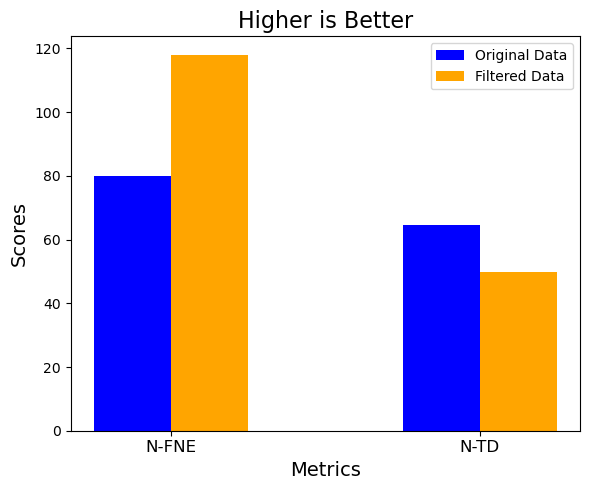

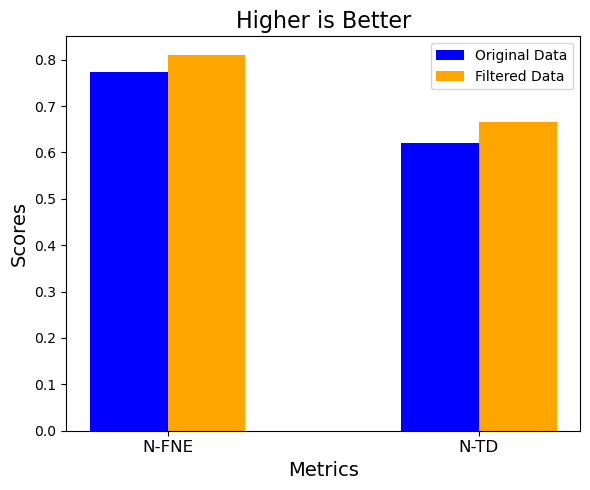

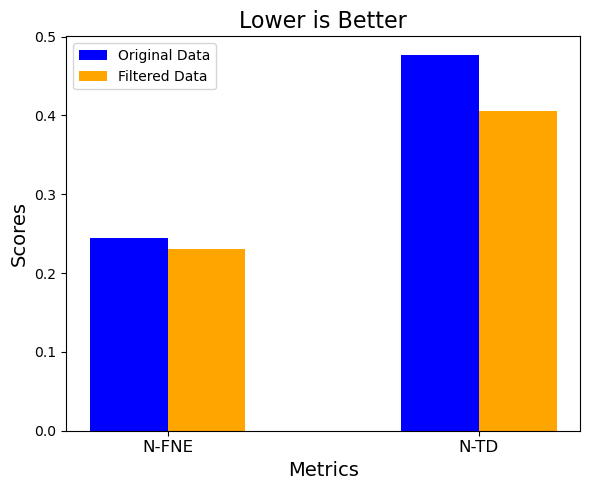

In [9]:
fne_scores = {'cluster_number': 3, 'ch-score': 80.09843998131755, 'silhoutte-score': 0.7731644596318016, 'db-score': 0.24412171783928996}
# fne_scores_filtered = {}

td_scores = {'cluster_number': 3, 'ch-score': 64.64647430131893, 'silhoutte-score': 0.6200575905045782, 'db-score': 0.4764433581008464}
# td_scores_filtered = {}

import numpy as np
def get_scores_plots(metrics, originalScores, filteredScores, title = 'Comparison of different Scores of Two Datasets for Two Algorithms'):
    # Set up the bar plot
    x = np.arange(2)  # label locations
    width = 0.25  # width of the bars

    fig, ax = plt.subplots(figsize=(6, 5))

    # Plot bars for each dataset
    bars1 = ax.bar(x - width/2, originalScores, width, label='Original Data', color='blue')
    bars2 = ax.bar(x + width/2, filteredScores, width, label='Filtered Data', color='orange')

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('Metrics', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_title(title,  fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(["N-FNE", "N-TD"], fontsize=12)
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.savefig(f"{metrics}.png", dpi=300)
    plt.show()

get_scores_plots(metrics = "./Plots/Home_plots/home_CH", originalScores= [fne_scores['ch-score'], td_scores['ch-score']], filteredScores= [fne_scores_filtered['ch-score'], td_scores_filtered['ch-score']], title= 'Higher is Better')
get_scores_plots(metrics = "./Plots/Home_plots/home_SH", originalScores= [fne_scores['silhoutte-score'], td_scores['silhoutte-score']], filteredScores= [fne_scores_filtered['silhoutte-score'], td_scores_filtered['silhoutte-score']], title= 'Higher is Better')
get_scores_plots(metrics = "./Plots/Home_plots/home_DB", originalScores= [fne_scores['db-score'], td_scores['db-score']], filteredScores= [fne_scores_filtered['db-score'], td_scores_filtered['db-score']], title= 'Lower is Better')


In [17]:
perc_CH_FNE = (fne_scores_filtered['ch-score'] - fne_scores['ch-score'])/fne_scores['ch-score'] *100
perc_SH_FNE = (fne_scores_filtered['silhoutte-score'] - fne_scores['silhoutte-score'])/fne_scores['silhoutte-score'] *100
perc_DB_FNE = (fne_scores_filtered['db-score'] - fne_scores['db-score'])/fne_scores['db-score'] *100

print(perc_CH_FNE, perc_SH_FNE, perc_DB_FNE)

perc_CH_TD = (td_scores_filtered['ch-score'] - td_scores['ch-score'])/td_scores['ch-score'] *100
perc_SH_TD = (td_scores_filtered['silhoutte-score'] - td_scores['silhoutte-score'])/td_scores['silhoutte-score'] *100
perc_DB_TD = (td_scores_filtered['db-score'] - td_scores['db-score'])/td_scores['db-score'] *100

print(perc_CH_TD, perc_SH_TD, perc_DB_TD)

47.19746481835002 4.756549185539908 -5.5555984915437975
-23.0264305035566 7.363041318260706 -14.817091224629781


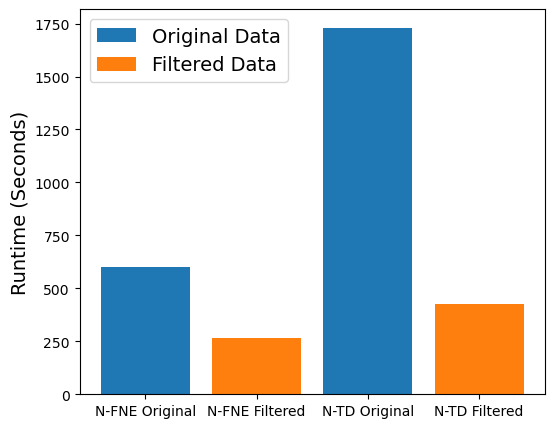

In [2]:
import matplotlib.pyplot as plt

# fnq_adjacency_matrix = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
# td_adjacency_matrix = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
# fnq_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
# td_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)

runtimes = []
functions = ['N-FNE Original', 'N-FNE Filtered', 'N-TD Original', 'N-TD Filtered']

# # Runtime for FNE original data
# start_time = time.time()
# frequent_next_event(home_data, fnq_adjacency_matrix)
# end_time = time.time()

# runtime1 = end_time - start_time
# runtimes.append(runtime1)

# # Runtime for FNE filtered data
# start_time = time.time()
# fd = anomaly_detection_and_removal(home_data, filtered_home_data, 'h')
# frequent_next_event(fd, fnq_adjacency_matrix_filtered)
# end_time = time.time()

# runtime2 = end_time - start_time
# runtimes.append(runtime2)

# # Runtime for TD original Data
# start_time = time.time()
# time_delta(home_data, td_adjacency_matrix)
# end_time = time.time()

# runtime3 = end_time - start_time
# runtimes.append(runtime3)

# # Runtime for TD filtered data
# start_time = time.time()
# fd2 = anomaly_detection_and_removal(home_data, filtered_home_data, 'h')
# time_delta(fd2, td_adjacency_matrix_filtered)
# end_time = time.time()

# runtime4 = end_time - start_time
# runtimes.append(runtime4)

# print(runtimes)

runtimes = [599.172899723053, 265.4587552547455, 1730.8033246994019, 427.48683047294617]

fig, ax = plt.subplots(figsize=(6, 5))
bar_labels = ['Original Data', 'Filtered Data', '_Original Data', '_Filtered Data']
bar_colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']

ax.bar(functions, runtimes, label=bar_labels, color=bar_colors)

ax.set_ylabel('Runtime (Seconds)', fontsize=14)
# ax.set_title('Runtime of different algorithms for regular and filtered data')
# ax.legend(title='Multi-User Home Data', fontsize=14)
ax.legend(loc='upper left', fontsize=14)

plt.savefig("./Plots/Home_plots/home_runtime.png", dpi=300)
plt.show()

In [16]:
## Get dynamic window

def get_time_window(original_data, min_window = 1, max_window = 6):
    unique_sensor = original_data.sensor_name.unique()

    
    best_window = None
    highest_score = float('-inf')  # Start with the lowest possible value
    for window in range(min_window, max_window+1):
        fd = anomaly_detection_and_removal_dbscan(original_data, f'{window}h')
        print(fd.shape)
        if fd.empty: continue
        fnq_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
        fnq_adjacency_matrix_filtered = frequent_next_event(fd, fnq_adjacency_matrix_filtered)
        clustering_scores = get_sensor_groups(adjacency_matrix=fnq_adjacency_matrix_filtered)
        current_score = clustering_scores['ch-score']
        print(f"current window: {window}, current ch score: {current_score}")
        if current_score > highest_score:
            highest_score = current_score
            best_window = window
    return best_window, highest_score

bw, hs = get_time_window( filtered_home_data, 1, 12)
print(f"best window: {bw}, highest ch score: {hs}")

(2403902, 9)


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 53.30413861944377, 'silhoutte-score': 0.6072308671352515, 'db-score': 0.5296242530796093, 'cluster': array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Closet Light', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom 

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 51.96355842503751, 'silhoutte-score': 0.6041405758443613, 'db-score': 0.5357856161771171, 'cluster': array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Closet Light', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom 

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 56.567214249386176, 'silhoutte-score': 0.6303031319733917, 'db-score': 0.5085621451691735, 'cluster': array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Closet Light', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 64.33303658245836, 'silhoutte-score': 0.6413010371788416, 'db-score': 0.46049824757426006, 'cluster': array([2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom Motion')
('Kitchen Motion', 'Motion Outside Room', 'Washroom Motion')
('En

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 79.6394404007042, 'silhoutte-score': 0.7531590457117829, 'db-score': 0.28215800255818546, 'cluster': array([0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Desk Left Sonar', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Desk Left Light', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  14
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Desk Left Light', 'Desk Left Sonar', 'Motion Outside Room')
('Desk Left Sonar', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Desk Left Sonar', 'Desk Right Sonar', 'Motion Outside R

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 55.165319964399536, 'silhoutte-score': 0.6087335847463905, 'db-score': 0.518174208782029, 'cluster': array([1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 2])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom Motion')
('Kitchen Motion', 'Motion Outside Room', 'Washroom Motion')
('Ent

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 64.74542149916223, 'silhoutte-score': 0.658211716981625, 'db-score': 0.4647816145196025, 'cluster': array([2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 0])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Closet Light', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom M

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 66.39378627484427, 'silhoutte-score': 0.7180071084296834, 'db-score': 0.30997796851075127, 'cluster': array([0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Desk Left Sonar', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Desk Left Light', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  14
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Desk Left Light', 'Desk Left Sonar', 'Motion Outside Room')
('Closet Light', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Desk Left Sonar', 'Motion Inside Room(East Corner)', 'Mot

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 79.63944040070432, 'silhoutte-score': 0.7531590457117839, 'db-score': 0.28215800255818413, 'cluster': array([0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Desk Left Sonar', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Desk Left Light', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  14
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Desk Left Light', 'Desk Left Sonar', 'Motion Outside Room')
('Desk Left Sonar', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Desk Left Sonar', 'Desk Right Sonar', 'Motion Outside 

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 79.63944040070426, 'silhoutte-score': 0.753159045711783, 'db-score': 0.28215800255818424, 'cluster': array([0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])}
['Motion Outside Room', 'Desk Left Sonar', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Desk Left Light', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  14
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Desk Left Light', 'Desk Left Sonar', 'Motion Outside Room')
('Desk Left Sonar', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Desk Left Sonar', 'Desk Right Sonar', 'Motion Outside R

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-package

{'cluster_number': 3, 'ch-score': 79.6394404007039, 'silhoutte-score': 0.7531590457117824, 'db-score': 0.28215800255818496, 'cluster': array([0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Desk Left Sonar', 'Desk Left Motion', 'Kitchen Motion', 'Desk Right Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Desk Left Light', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  14
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Desk Left Light', 'Desk Left Sonar', 'Motion Outside Room')
('Desk Left Sonar', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Desk Left Sonar', 'Desk Right Sonar', 'Motion Outside R

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_12860\1995110151.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t


{'cluster_number': 3, 'ch-score': 52.18956327912708, 'silhoutte-score': 0.6227342085741888, 'db-score': 0.4882567735688812, 'cluster': array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Motion Inside Room(East Corner)', 'Washroom Motion', 'Washroom Door', 'Room Door', 'Entrance Door', 'Closet Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Kitchen Temperature', 'Kitchen Humidity', 'Washroom Temperature', 'Desk Right Sonar', 'Desk Left Light']
['Bedroom Humidity', 'Motion Inside Room(West Corner)', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  9
('Kitchen Light', 'Kitchen Motion', 'Motion Outside Room')
('Closet Light', 'Motion Inside Room(East Corner)', 'Motion Outside Room')
('Motion Inside Room(East Corner)', 'Motion Outside Room', 'Room Door')
('Motion Outside Room', 'Washroom Door', 'Washroom 

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [32]:
## Anomaly detection just based on the values - traditional method
# Combine duplicates into lists
df_combined = filtered_home_data.groupby(["datetime", "sensor_name"])["state"].apply(list).reset_index()

# Pivot the data
pivoted_df = df_combined.pivot(index="datetime", columns="sensor_name", values="state")

# Reset column names for better readability (optional)
pivoted_df.columns.name = None
pivoted_df.reset_index(inplace=True)

# Replace NaN with a placeholder list [0]
pivoted_df = pivoted_df.fillna(0)
# pivoted_df = pivoted_df.applymap(lambda x: x if isinstance(x, list) else [0.0])
# Display the resulting DataFrame
pivoted_df.set_index("datetime", inplace=True)
print(pivoted_df)

                              Bedroom Humidity Bedroom Light  \
datetime                                                       
2024-02-15 00:00:00.969993353                0             0   
2024-02-15 00:00:01.673879623                0             0   
2024-02-15 00:00:02.473011255                0             0   
2024-02-15 00:00:02.493557692                0             0   
2024-02-15 00:00:02.735476732                0             0   
...                                        ...           ...   
2024-06-15 23:59:57.902232409                0             0   
2024-06-15 23:59:58.562231541                0             0   
2024-06-15 23:59:59.003911017                0             0   
2024-06-15 23:59:59.222363949                0             0   
2024-06-15 23:59:59.440574646                0             0   

                              Bedroom Temperature Closet Door Closet Light  \
datetime                                                                     
2024-02-15 

In [33]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


# print(pivoted_df.head(10))
# pivoted_df = pivoted_df.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)
pivoted_df_IF = pivoted_df.applymap(lambda x: x[0] if isinstance(x, list) else x)

# Initialize and fit the IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)
# Step 1: Select sensor columns
sensor_columns = [col for col in pivoted_df_IF.columns if col != "datetime"]

# Step 2: Normalize sensor values using z-score
pivoted_df_IF[sensor_columns] = pivoted_df_IF[sensor_columns].apply(zscore)
pivoted_df_IF["anomaly"] = model.fit_predict(pivoted_df_IF)

# Separate normal data and anomalies
normal_data = pivoted_df[pivoted_df_IF["anomaly"] == 1]
anomalies = pivoted_df[pivoted_df_IF["anomaly"] == -1]

# print(pivoted_df_IF.head(10))

# Step 1: Calculate the percentage of anomalies
total_rows = len(pivoted_df_IF)
anomalous_rows = len(pivoted_df_IF[pivoted_df_IF["anomaly"] == -1])
anomaly_percentage = (anomalous_rows / total_rows) * 100
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

# Step 2: Remove anomalous data
anomlaous_data = pivoted_df_IF[pivoted_df_IF["anomaly"] == -1].drop(columns=["anomaly"])
print(f"anomalous data shape: {normal_data.shape}")
# Step 3: Unpivot the normal data back to original format
# unpivoted_df = normal_data.reset_index().melt(id_vars="datetime", var_name="sensor_name", value_name="state")
anomalous_datetime = anomlaous_data.index
filtered_df_old = filtered_home_data[~filtered_home_data.index.isin(anomalous_datetime)]

# Display the result
print("\nUnpivoted Normal Data: ", filtered_df_old.shape)
print(filtered_home_data.shape)

C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28648\478445737.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivoted_df_IF = pivoted_df.applymap(lambda x: x[0] if isinstance(x, list) else x)


Percentage of anomalies: 2.69%
anomalous data shape: (2729464, 24)

Unpivoted Normal Data:  (2786566, 8)
(2958760, 8)


In [34]:
# unpivoted_df["seconds"] = unpivoted_df["datetime"].astype('int64') 
unique_sensor = filtered_df_old.sensor_name.unique()

fnq_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)
td_adjacency_matrix_filtered = pd.DataFrame(0.0, columns=unique_sensor, index=unique_sensor)

print('Frequent next event starts')
print('---------------------------')
fnq_adjacency_matrix_filtered = frequent_next_event(filtered_df_old, fnq_adjacency_matrix_filtered)
print('---------------------------')
print('Frequent next event ends')

print('Time Delta starts')
print('---------------------------')
td_adjacency_matrix_filtered = time_delta(filtered_df_old, td_adjacency_matrix_filtered)
print('---------------------------')
print('Time Delta ends')


fne_scores_filtered_old_method = get_sensor_groups(adjacency_matrix=fnq_adjacency_matrix_filtered)

print("~~~ Time Delta results ~~~")

td_scores_filtered_old_method = get_sensor_groups(td_adjacency_matrix_filtered)

Frequent next event starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28648\4284628992.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[prev_row.sensor_name][cur_row.sensor_name] += 1/t


---------------------------
Frequent next event ends
Time Delta starts
---------------------------


C:\Users\mt5864s\AppData\Local\Temp\ipykernel_28648\4284628992.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjacency_matrix[item][cur_row.sensor_name] += 1


---------------------------
Time Delta ends
{'cluster_number': 3, 'ch-score': 119.0174913599339, 'silhoutte-score': 0.6839807146508402, 'db-score': 0.3300335423119642, 'cluster': array([2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2,
       2, 1])}
['Motion Outside Room', 'Kitchen Motion', 'Entrance Motion', 'Room Door', 'Entrance Door', 'Closet Light', 'Kitchen Light']
['Desk Left Sonar', 'Desk Left Motion', 'Desk Right Motion', 'Washroom Humidity', 'Motion Inside Room(East Corner)', 'Desk Right Sonar', 'Desk Left Light', 'Kitchen Humidity', 'Washroom Motion', 'Washroom Door', 'Washroom Temperature', 'Kitchen Temperature', 'Closet Door']
['Motion Inside Room(West Corner)', 'Bedroom Humidity', 'Bedroom Temperature', 'Bedroom Light']
number of unique group  5
('Kitchen Motion', 'Motion Outside Room', 'Room Door')
('Entrance Motion', 'Kitchen Motion', 'Motion Outside Room')
('Closet Light', 'Entrance Motion', 'Motion Outside Room')
('Kitchen Light', 'Kitchen Motion', 'M

c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
c:\Users\mt5864s\AppData\Local\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its 

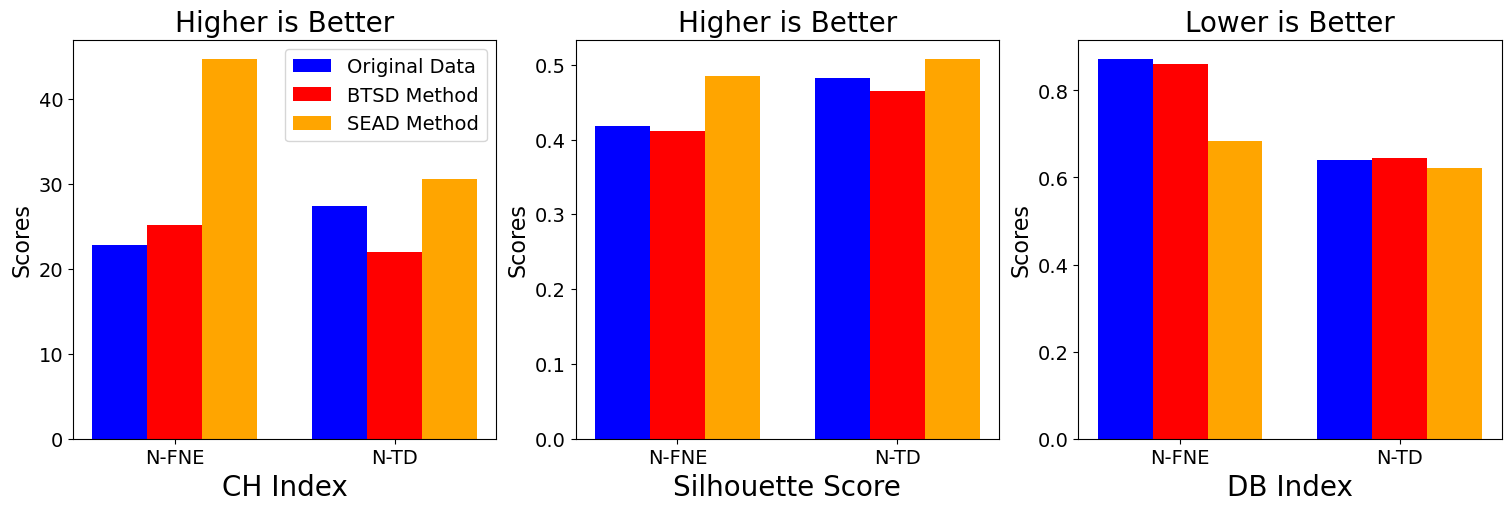

In [3]:
import numpy as np
fne_scores = {'cluster_number': 3, 'ch-score': 22.819819422164528, 'silhoutte-score': 0.4183782712056114, 'db-score': 0.8727421266347455}
td_scores = {'cluster_number': 3, 'ch-score': 27.420150934721683, 'silhoutte-score': 0.4825859815570511, 'db-score': 0.6393233542261778}

fne_scores_filtered = {'cluster_number': 3, 'ch-score': 44.686158129193245, 'silhoutte-score': 0.485248697085666, 'db-score': 0.6839582143931304}
td_scores_filtered = {'cluster_number': 3, 'ch-score': 30.558311891898505, 'silhoutte-score': 0.5081161340811712, 'db-score': 0.6216727058976016}

#{'cluster_number': 3, 'ch-score': 119.01749135993435, 'silhoutte-score': 0.6839807146508413, 'db-score': 0.33003354231196386}
#{'cluster_number': 3, 'ch-score': 55.74852544017011, 'silhoutte-score': 0.5553648331141768, 'db-score': 0.5172136626380263}
fne_scores_filtered_old_method = {'cluster_number': 3, 'ch-score': 25.142380050872635, 'silhoutte-score': 0.4110422927421935, 'db-score': 0.8611970119901088}
td_scores_filtered_old_method = {'cluster_number': 3, 'ch-score': 21.945066394341936, 'silhoutte-score': 0.4651480906077261, 'db-score': 0.6449519236403695}

def get_scores_plots(metrics_list, index_list, originalScores_list, filteredScores_list, filteredScoresOld_list, 
                      title='Comparison of different Scores of Two Datasets for Two Algorithms'):
    # Set up the figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)  # Adjusted width for better fit

    width = 0.25  # Width of bars
    for i, (metrics, index, originalScores, filteredScores, filteredScoresOld) in enumerate(
            zip(metrics_list,index_list, originalScores_list, filteredScores_list, filteredScoresOld_list)):
        
        x = np.arange(len(originalScores))  # Label locations based on number of metrics
        ax = axes[i]  # Select subplot
        
        # Plot bars for each dataset
        ax.bar(x - width, originalScores, width, color='blue', label='Original Data' if i == 0 else None)
        ax.bar(x, filteredScoresOld, width, color='red', label='BTSD Method' if i == 0 else None)
        ax.bar(x + width, filteredScores, width, color='orange', label='SEAD Method' if i == 0 else None)

        # Add labels, title, and custom x-axis tick labels
        ax.set_xlabel(f'{index}', fontsize=20)
        ax.set_title(f"{metrics}", fontsize=20)
        ax.set_xticks(x)
        ax.set_xticklabels(["N-FNE", "N-TD"], fontsize=16)

        # Add Y-axis label to every subplot
        ax.set_ylabel('Scores', fontsize=16)
        # Increase tick font sizes
        ax.tick_params(axis='both', which='major', labelsize=14)

    # Set global title
    # fig.suptitle(title, fontsize=16)

    # Place legend inside the first subplot (instead of a global legend)
    axes[0].legend(loc='upper right', fontsize=14)

    # Save and show plot
    plt.savefig("./Plots/Home_plots/home_combined_scores_binary.png", dpi=300)
    plt.show()


# Example usage with three different sets of data
metrics_list = ['Higher is Better', 'Higher is Better', 'Lower is Better']
index_list = ['CH Index', 'Silhouette Score', 'DB Index']
originalScores_list = [[fne_scores['ch-score'], td_scores['ch-score']], [fne_scores['silhoutte-score'], td_scores['silhoutte-score']], [fne_scores['db-score'], td_scores['db-score']]]
filteredScores_list = [[fne_scores_filtered['ch-score'], td_scores_filtered['ch-score']], [fne_scores_filtered['silhoutte-score'], td_scores_filtered['silhoutte-score']], [fne_scores_filtered['db-score'], td_scores_filtered['db-score']]]
filteredScoresOld_list = [[fne_scores_filtered_old_method['ch-score'], td_scores_filtered_old_method['ch-score']], [fne_scores_filtered_old_method['silhoutte-score'], td_scores_filtered_old_method['silhoutte-score']], [fne_scores_filtered_old_method['db-score'], td_scores_filtered_old_method['db-score']]]

get_scores_plots(metrics_list, index_list, originalScores_list, filteredScores_list, filteredScoresOld_list)

# get_scores_plots(metrics = "./Plots/Home_plots/home_CH_new", originalScores= [fne_scores['ch-score'], td_scores['ch-score']], filteredScores= [fne_scores_filtered['ch-score'], td_scores_filtered['ch-score']], filteredScoresOld= [fne_scores_filtered_old_method['ch-score'], td_scores_filtered_old_method['ch-score']], title= 'Higher is Better')
# get_scores_plots(metrics = "./Plots/Home_plots/home_SH_new", originalScores= [fne_scores['silhoutte-score'], td_scores['silhoutte-score']], filteredScores= [fne_scores_filtered['silhoutte-score'], td_scores_filtered['silhoutte-score']], filteredScoresOld= [fne_scores_filtered_old_method['silhoutte-score'], td_scores_filtered_old_method['silhoutte-score']], title= 'Higher is Better')
# get_scores_plots(metrics = "./Plots/Home_plots/home_DB_new", originalScores= [fne_scores['db-score'], td_scores['db-score']], filteredScores= [fne_scores_filtered['db-score'], td_scores_filtered['db-score']], filteredScoresOld= [fne_scores_filtered_old_method['db-score'], td_scores_filtered_old_method['db-score']], title= 'Lower is Better')


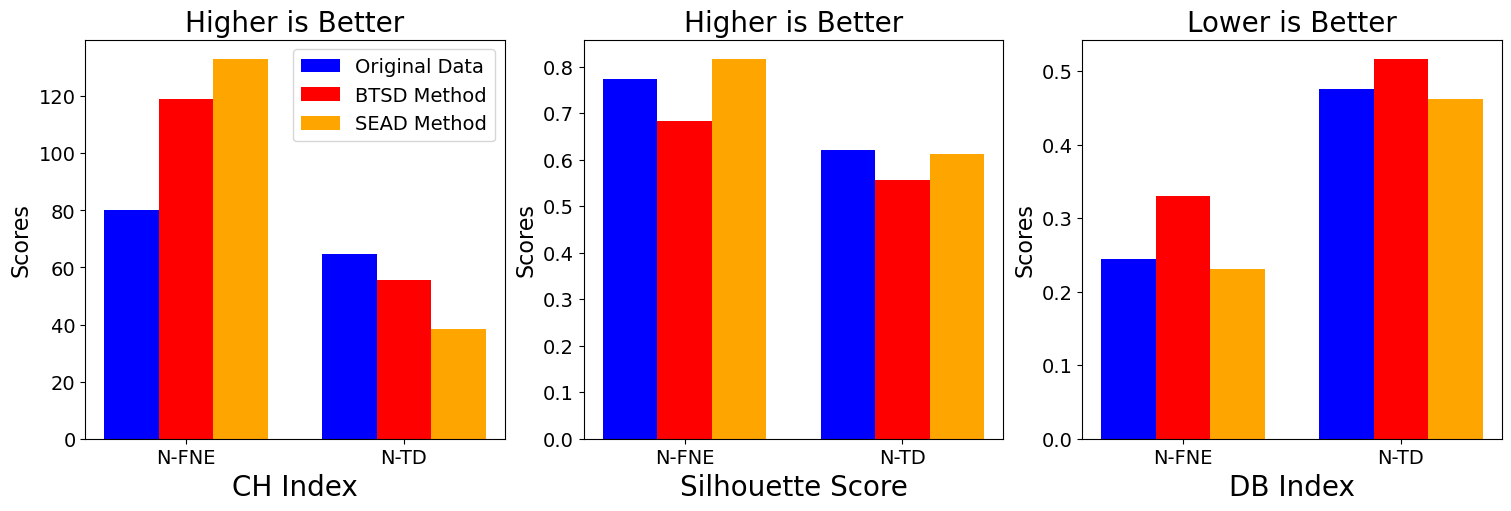

In [4]:
import numpy as np
fne_scores = {'cluster_number': 3, 'ch-score': 80.09843998131755, 'silhoutte-score': 0.7731644596318016, 'db-score': 0.24412171783928996}
td_scores = {'cluster_number': 3, 'ch-score': 64.64647430131893, 'silhoutte-score': 0.6200575905045782, 'db-score': 0.4764433581008464}

fne_scores_filtered = {'cluster_number': 3, 'ch-score': 133.1448909676949, 'silhoutte-score': 0.8170811503264086, 'db-score': 0.2310413570519105}
td_scores_filtered = {'cluster_number': 3, 'ch-score': 38.544028602481575, 'silhoutte-score': 0.6112795854793245, 'db-score': 0.4620579145918999}

#{'cluster_number': 3, 'ch-score': 119.01749135993435, 'silhoutte-score': 0.6839807146508413, 'db-score': 0.33003354231196386}
#{'cluster_number': 3, 'ch-score': 55.74852544017011, 'silhoutte-score': 0.5553648331141768, 'db-score': 0.5172136626380263}
fne_scores_filtered_old_method = {'cluster_number': 3, 'ch-score': 119.01749135993435, 'silhoutte-score': 0.6839807146508413, 'db-score': 0.33003354231196386}
td_scores_filtered_old_method = {'cluster_number': 3, 'ch-score': 55.74852544017011, 'silhoutte-score': 0.5553648331141768, 'db-score': 0.5172136626380263}

def get_scores_plots(metrics_list, index_list, originalScores_list, filteredScores_list, filteredScoresOld_list, 
                      title='Comparison of different Scores of Two Datasets for Two Algorithms'):
    # Set up the figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)  # Adjusted width for better fit

    width = 0.25  # Width of bars
    for i, (metrics, index, originalScores, filteredScores, filteredScoresOld) in enumerate(
            zip(metrics_list,index_list, originalScores_list, filteredScores_list, filteredScoresOld_list)):
        
        x = np.arange(len(originalScores))  # Label locations based on number of metrics
        ax = axes[i]  # Select subplot
        
        # Plot bars for each dataset
        ax.bar(x - width, originalScores, width, color='blue', label='Original Data' if i == 0 else None)
        ax.bar(x, filteredScoresOld, width, color='red', label='BTSD Method' if i == 0 else None)
        ax.bar(x + width, filteredScores, width, color='orange', label='SEAD Method' if i == 0 else None)

        # Add labels, title, and custom x-axis tick labels
        ax.set_xlabel(f'{index}', fontsize=20)
        ax.set_title(f"{metrics}", fontsize=20)
        ax.set_xticks(x)
        ax.set_xticklabels(["N-FNE", "N-TD"], fontsize=16)

        # Add Y-axis label to every subplot
        ax.set_ylabel('Scores', fontsize=16)
        # Increase tick font sizes
        ax.tick_params(axis='both', which='major', labelsize=14)

    # Set global title
    # fig.suptitle(title, fontsize=16)

    # Place legend inside the first subplot (instead of a global legend)
    axes[0].legend(loc='upper right', fontsize=14)

    # Save and show plot
    plt.savefig("./Plots/Home_plots/home_combined_scores.png", dpi=300)
    plt.show()


# Example usage with three different sets of data
metrics_list = ['Higher is Better', 'Higher is Better', 'Lower is Better']
index_list = ['CH Index', 'Silhouette Score', 'DB Index']
originalScores_list = [[fne_scores['ch-score'], td_scores['ch-score']], [fne_scores['silhoutte-score'], td_scores['silhoutte-score']], [fne_scores['db-score'], td_scores['db-score']]]
filteredScores_list = [[fne_scores_filtered['ch-score'], td_scores_filtered['ch-score']], [fne_scores_filtered['silhoutte-score'], td_scores_filtered['silhoutte-score']], [fne_scores_filtered['db-score'], td_scores_filtered['db-score']]]
filteredScoresOld_list = [[fne_scores_filtered_old_method['ch-score'], td_scores_filtered_old_method['ch-score']], [fne_scores_filtered_old_method['silhoutte-score'], td_scores_filtered_old_method['silhoutte-score']], [fne_scores_filtered_old_method['db-score'], td_scores_filtered_old_method['db-score']]]

get_scores_plots(metrics_list, index_list, originalScores_list, filteredScores_list, filteredScoresOld_list)

# get_scores_plots(metrics = "./Plots/Home_plots/home_CH", originalScores= [fne_scores['ch-score'], td_scores['ch-score']], filteredScores= [fne_scores_filtered['ch-score'], td_scores_filtered['ch-score']], filteredScoresOld= [fne_scores_filtered_old_method['ch-score'], td_scores_filtered_old_method['ch-score']], title= 'Higher is Better')
# get_scores_plots(metrics = "./Plots/Home_plots/home_SH", originalScores= [fne_scores['silhoutte-score'], td_scores['silhoutte-score']], filteredScores= [fne_scores_filtered['silhoutte-score'], td_scores_filtered['silhoutte-score']], filteredScoresOld= [fne_scores_filtered_old_method['silhoutte-score'], td_scores_filtered_old_method['silhoutte-score']], title= 'Higher is Better')
# get_scores_plots(metrics = "./Plots/Home_plots/home_DB", originalScores= [fne_scores['db-score'], td_scores['db-score']], filteredScores= [fne_scores_filtered['db-score'], td_scores_filtered['db-score']], filteredScoresOld= [fne_scores_filtered_old_method['db-score'], td_scores_filtered_old_method['db-score']], title= 'Lower is Better')
